In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist
# from tf.keras.models import Sequential  # This does not work!
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding,LSTM
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Cloning into 'data'...
remote: Counting objects: 25, done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [18]:
cd all

/home/data/all


In [0]:
import pandas as pd
import seaborn as sns

In [0]:
train=pd.read_csv('train.tsv',sep='\t')
test=pd.read_csv('test.tsv',sep='\t')
sample=pd.read_csv('sampleSubmission.csv')

In [20]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [22]:
sample.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [25]:
train['Sentiment'].unique()

array([1, 2, 3, 4, 0])

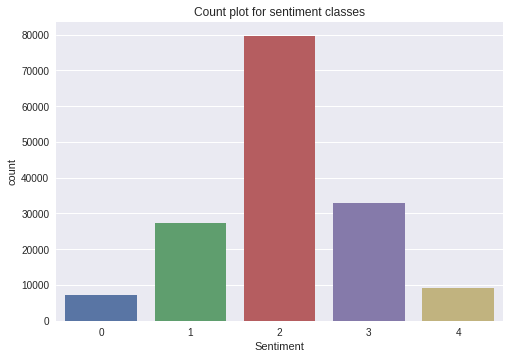

In [29]:
sns.countplot(train['Sentiment']).set_title("Count plot for sentiment classes")
plt.show()

In [31]:
print("Train-set size: ", len(train))
print("Test-set size:  ", len(test))

Train-set size:  156060
Test-set size:   66292


In [0]:
tokenizer = Tokenizer(num_words=10000)


In [0]:
tokenizer.fit_on_texts(train['Phrase'])


In [36]:
tokenizer.word_index


{'the': 1,
 'a': 2,
 'of': 3,
 'and': 4,
 'to': 5,
 "'s": 6,
 'in': 7,
 'is': 8,
 'that': 9,
 'it': 10,
 'as': 11,
 'with': 12,
 'for': 13,
 'its': 14,
 'film': 15,
 'an': 16,
 'movie': 17,
 'this': 18,
 'but': 19,
 'be': 20,
 'on': 21,
 'you': 22,
 'by': 23,
 "n't": 24,
 'more': 25,
 'his': 26,
 'one': 27,
 'about': 28,
 'not': 29,
 'at': 30,
 'or': 31,
 'than': 32,
 'from': 33,
 'all': 34,
 'like': 35,
 'have': 36,
 'are': 37,
 'has': 38,
 "'": 39,
 'so': 40,
 'out': 41,
 'story': 42,
 'rrb': 43,
 'up': 44,
 'who': 45,
 'good': 46,
 'too': 47,
 'most': 48,
 'into': 49,
 'lrb': 50,
 'if': 51,
 'what': 52,
 'time': 53,
 'their': 54,
 'no': 55,
 'characters': 56,
 'much': 57,
 "''": 58,
 'comedy': 59,
 'i': 60,
 'your': 61,
 'can': 62,
 'just': 63,
 'life': 64,
 'some': 65,
 'does': 66,
 'even': 67,
 'little': 68,
 'funny': 69,
 'will': 70,
 'well': 71,
 'way': 72,
 'very': 73,
 'been': 74,
 'any': 75,
 'make': 76,
 'only': 77,
 'which': 78,
 'he': 79,
 'movies': 80,
 'director': 81,
 '

In [0]:
train_tokens = tokenizer.texts_to_sequences(train['Phrase']) # converting all the text in training data to tokens


In [0]:
num_tokens = np.array([len(tokens) for tokens in train_tokens])


In [41]:
np.mean(num_tokens)

6.6524605920799695

In [0]:
pad = 'pre'


In [0]:
x_train_pad = pad_sequences(train_tokens, maxlen=7,
                            padding=pad, truncating=pad)

In [0]:
model = Sequential()


In [0]:
embedding_size = 300


In [0]:
model.add(Embedding(input_dim=10000,
                   output_dim=embedding_size,
                   input_length=7,
                   ))

In [0]:
model.add(GRU(units=16, return_sequences=True))#layer below will be processing sequences so thats why return_sequences=True


In [0]:
model.add(LSTM(units=16, return_sequences=True))#layer below will be processing sequences so thats why return_sequences=True


In [0]:
model.add(LSTM(units=20))# now we don't need sequences because in the next layer we will predict the output


In [0]:
model.add(Dense(5, activation='sigmoid'))

In [0]:
optimizer = Adam(lr=1e-3)


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
from keras.utils import to_categorical

y=to_categorical(train['Sentiment'])

In [155]:
history=model.fit(x_train_pad,y,
          validation_split=0.05, epochs=5, batch_size=50)

Train on 148257 samples, validate on 7803 samples
Epoch 1/5
 33400/148257 [=====>........................] - ETA: 2:26 - loss: 0.7310 - acc: 0.6973

102900/148257 [===================>..........] - ETA: 58s - loss: 0.7488 - acc: 0.6922

148257/148257 [==============================] - 193s 1ms/step - loss: 0.7522 - acc: 0.6911 - val_loss: 1.1302 - val_acc: 0.5695
Epoch 2/5
  4250/148257 [..............................] - ETA: 3:06 - loss: 0.6799 - acc: 0.7209

 86050/148257 [================>.............] - ETA: 1:19 - loss: 0.7072 - acc: 0.7098

148250/148257 [============================>.] - ETA: 0s - loss: 0.7195 - acc: 0.7043

148257/148257 [==============================] - 191s 1ms/step - loss: 0.7195 - acc: 0.7043 - val_loss: 1.1489 - val_acc: 0.5597
Epoch 3/5
 22050/148257 [===>..........................] - ETA: 2:37 - loss: 0.6611 - acc: 0.7278

105700/148257 [====================>.........] - ETA: 53s - loss: 0.6870 - acc: 0.7166

148257/148257 [==============================] - 188s 1ms/step - loss: 0.6925 - acc: 0.7145 - val_loss: 1.1660 - val_acc: 0.5609
Epoch 4/5
  5800/148257 [>.............................] - ETA: 3:00 - loss: 0.6318 - acc: 0.7353

 82450/148257 [===============>..............] - ETA: 1:23 - loss: 0.6537 - acc: 0.7308

148250/148257 [============================>.] - ETA: 0s - loss: 0.6681 - acc: 0.7241

148257/148257 [==============================] - 189s 1ms/step - loss: 0.6681 - acc: 0.7241 - val_loss: 1.1961 - val_acc: 0.5590
Epoch 5/5
 22050/148257 [===>..........................] - ETA: 2:39 - loss: 0.6189 - acc: 0.7466

 98550/148257 [==================>...........] - ETA: 1:02 - loss: 0.6367 - acc: 0.7370

148257/148257 [==============================] - 189s 1ms/step - loss: 0.6466 - acc: 0.7319 - val_loss: 1.2490 - val_acc: 0.5476


In [0]:
tokenizer.fit_on_texts(test['Phrase'])
test_tokens = tokenizer.texts_to_sequences(test['Phrase']) # converting all the text in training data to tokens
test_pad = pad_sequences(test_tokens, maxlen=7,
                            padding=pad, truncating=pad)



In [118]:
ypred=model.predict_classes(test_pad,verbose=1)

66292/66292 [==============================] - 27s 410us/step


array([2, 2, 2, ..., 2, 2, 2])

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [0]:
sample['Sentiment']=ypred

In [0]:
sample.to_csv('kagg.csv', index = False)

kagg.csv  sampleSubmission.csv  test.tsv  train.tsv
